## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

1. Greater data set increases slope parameters and generates a more stabe calculation to fit both gausian and skewed curves.

2. If it is very far away the data takes longer to sync properly, and if it is extremely close it can 'hop' across and add a temporary skew requiring moe processing than a 'good' guess. This inturn increses desired sample count in either case.

3. The stats.norm.logpdf function from the scipy.stats module calculates the logarithm of the Probability Density Function (PDF) of a normal distribution at a given value. In this case from the given array with mean of 100 and scale (std) of 3.

In [1]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)

samples = 1000
mu      = 2  # mean
sigma   = 6 # scale (standard deviation)


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.logistic(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 1.871 std*  = 10.969
mean   = 2.000 std   = 6.000


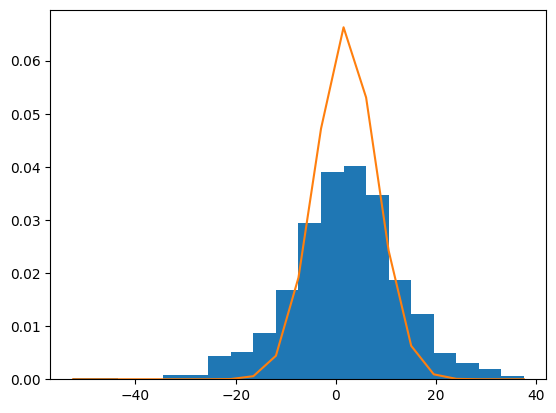

In [2]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()